# <span style = "color:coral"> Movie Genre Classification </span>

***

### Import necessary Libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

### Read 'train_data.txt' and Store it in a Dataframe Variable

<span style ="color:blue">Use pd.read_fwf to read txt files'</span>

In [53]:
df = pd.read_csv('train_data.txt',sep = '\t', names = [0])

In [54]:
df

,0
0,1 ::: Oscar et la dame rose (2009) ::: drama :...
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu..."
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...
4,5 ::: The Unrecovered (2007) ::: drama ::: The...
...,...
54209,"54210 ::: ""Bonino"" (1953) ::: comedy ::: This ..."
54210,54211 ::: Dead Girls Don't Cry (????) ::: horr...
54211,54212 ::: Ronald Goedemondt: Ze bestaan echt (...
54212,54213 ::: Make Your Own Bed (1944) ::: comedy ...


In [55]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


### Remove all columns except the first ( Zeroth Index)

In [56]:

#if type(df) == pd.core.frame.DataFrame:
    
columns_to_keep = [df.columns[0]]

    # Drop all other columns
df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])


In [57]:
df = pd.DataFrame(df)

df[0][2]

'3 ::: Young, Wild and Wonderful (1980) ::: adult ::: As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fantasies one can imagine. After the films, they release the emotion of the fantasies in the most erotic and uncommon ways. One slips off to the curator\'s office for a little "acquisition. " Another finds the anthropologist to see what bones can be identified. Even the head teacher isn\'t immune. Soon the tour is over, but as the bus departs, everyone admits it was quite an education.'

### Fetch the Genres from the text and store it in a new column

In [58]:
df['Genre'] = df[0].apply(lambda x: x.split('::')[2].split(' ')[1])

In [91]:
df['Genre'].value_counts()

drama          13578
documentary    13079
comedy          7432
short           5061
horror          2204
thriller        1591
action          1313
western         1032
reality-tv       883
family           776
adventure        775
music            719
romance          671
sci-fi           647
adult            589
crime            504
animation        498
sport            430
talk-show        388
fantasy          323
mystery          319
musical          277
biography        265
history          243
game-show        194
news             181
war              132
Big                1
Name: Genre, dtype: int64

In [59]:
df.head()

,0,Genre
0,1 ::: Oscar et la dame rose (2009) ::: drama :...,drama
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...,thriller
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",adult
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...,drama
4,5 ::: The Unrecovered (2007) ::: drama ::: The...,drama


### Fetch the plot from the text and Store it in a new column

In [60]:
df[0].apply(lambda x:x.split(':::')[3])

0         Listening in to a conversation between his do...
1         A brother and sister with a past incestuous r...
2         As the bus empties the students for their fie...
3         To help their unemployed father make ends mee...
4         The film's title refers not only to the un-re...
                               ...                        
54209     This short-lived NBC live sitcom centered on ...
54210     The NEXT Generation of EXPLOITATION. The sist...
54211     Ze bestaan echt, is a stand-up comedy about g...
54212     Walter and Vivian live in the country and hav...
54213     On Labor Day Weekend, 1935, the most intense ...
Name: 0, Length: 54214, dtype: object

In [61]:
df['Plot'] = df[0].apply(lambda x:x.split(':::')[3])

In [62]:
df.head()

,0,Genre,Plot
0,1 ::: Oscar et la dame rose (2009) ::: drama :...,drama,Listening in to a conversation between his do...
1,2 ::: Cupid (1997) ::: thriller ::: A brother ...,thriller,A brother and sister with a past incestuous r...
2,"3 ::: Young, Wild and Wonderful (1980) ::: adu...",adult,As the bus empties the students for their fie...
3,4 ::: The Secret Sin (1915) ::: drama ::: To h...,drama,To help their unemployed father make ends mee...
4,5 ::: The Unrecovered (2007) ::: drama ::: The...,drama,The film's title refers not only to the un-re...


### Drop all columns except Genre and Plot

In [63]:
df = df[['Genre','Plot']]

In [64]:
df.head()

,Genre,Plot
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


In [65]:
df.head()

,Genre,Plot
0,drama,Listening in to a conversation between his do...
1,thriller,A brother and sister with a past incestuous r...
2,adult,As the bus empties the students for their fie...
3,drama,To help their unemployed father make ends mee...
4,drama,The film's title refers not only to the un-re...


#### Check for null values, Remove if any

In [66]:
df.isna().sum()

Genre    0
Plot     0
dtype: int64

### Check for duplicates, Remove if any

In [67]:
df.duplicated().sum()

109

In [68]:
df.drop_duplicates(inplace=True)

In [69]:
df.duplicated().sum()

0

### Plot a countplot of Genre

<AxesSubplot:xlabel='count', ylabel='Genre'>

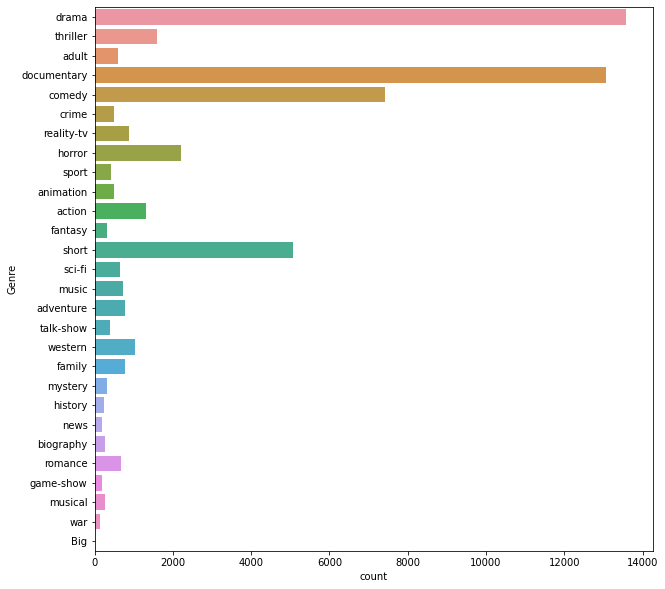

In [70]:
plt.figure(figsize=(10,10))

sns.countplot(y=df['Genre'])

### Print some of the texts in Plot

In [71]:
for i in range(4):
    print(df['Plot'][i])
    print()

 Listening in to a conversation between his doctor and parents, 10-year-old Oscar learns what nobody has the courage to tell him. He only has a few weeks to live. Furious, he refuses to speak to anyone except straight-talking Rose, the lady in pink he meets on the hospital stairs. As Christmas approaches, Rose uses her fantastical experiences as a professional wrestler, her imagination, wit and charm to allow Oscar to live life and love to the full, in the company of his friends Pop Corn, Einstein, Bacon and childhood sweetheart Peggy Blue.

 A brother and sister with a past incestuous relationship have a current murderous relationship. He murders the women who reject him and she murders the women who get too close to him.

 As the bus empties the students for their field trip to the Museum of Natural History, little does the tour guide suspect that the students are there for more than just another tour. First, during the lecture films, the coeds drift into dreams of the most erotic fa

### Convert Genre into numerical values with LabelBinalizer

In [72]:
from sklearn.preprocessing import LabelBinarizer

In [73]:
lb = LabelBinarizer()

In [74]:
genre = lb.fit_transform(df['Genre'])
genre

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Create a function to preprocess the text
* Remove any stopwords
* Convert all text into lowercase
* Lemmatize the text
* Remove any special symbols or characters

In [75]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [76]:
# def preprocess(phrase):
#     text = re.sub(r"[^ a-zA-Z0-9]",' ',phrase).split()
#     words = [x.lower() for x in text if x not in stopwords.words('english')]
#     lm = WordNetLemmatizer()
#     word = [lm.lemmatize (word,'v') for word in words]
    
#     word = ' '.join(word)
#     return word


In [77]:
def preprocess(sentence):
    text = re.sub(r"[^a-zA-Z0-9]",' ',sentence).split()
    
    words = [x.lower() for x in text if x not in stopwords.words('english')] 
    
    lm = WordNetLemmatizer()
    
    word = [lm.lemmatize(word,'v') for word in words]
    
    word = ' '.join(word)
    
    return word

In [79]:
df['Plot'] = df['Plot'].apply(preprocess)

In [80]:
df.head()

,Genre,Plot
0,drama,listen conversation doctor parent 10 year old ...
1,thriller,brother sister past incestuous relationship cu...
2,adult,bus empty students field trip museum natural h...
3,drama,help unemployed father make end meet edith twi...
4,drama,film title refer un recover body grind zero al...


### Print some of the text in Plot after the preprocess

In [81]:
for i in range(4):
    print(df['Plot'][i])
    print()

listen conversation doctor parent 10 year old oscar learn nobody courage tell weeks live furious refuse speak anyone except straight talk rise lady pink meet hospital stairs christmas approach rise use fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue

brother sister past incestuous relationship current murderous relationship murder women reject murder women get close

bus empty students field trip museum natural history little tour guide suspect students another tour first lecture film coeds drift dream erotic fantasy one imagine film release emotion fantasy erotic uncommon ways one slip curator office little acquisition another find anthropologist see bone identify even head teacher immune soon tour bus depart everyone admit quite education

help unemployed father make end meet edith twin sister grace work seamstresses invalid grace fall prey temptations chinatown 

listen conversation doctor parent 10 year old oscar learn nobody courage tell he weeks live furious refuse speak anyone except straight talk rise lady pink meet hospital stairs as christmas approach rise use fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friends pop corn einstein bacon childhood sweetheart peggy blue

a brother sister past incestuous relationship current murderous relationship he murder women reject murder women get close

as bus empty students field trip museum natural history little tour guide suspect students another tour first lecture film coeds drift dream erotic fantasy one imagine after film release emotion fantasy erotic uncommon ways one slip curator office little acquisition another find anthropologist see bone identify even head teacher immune soon tour bus depart everyone admit quite education

to help unemployed father make end meet edith twin sister grace work seamstresses an invalid grace fall p

### Split the dataset into training and testing set

In [82]:
x = df['Plot']
y = genre

In [83]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

<IPython.core.display.Javascript object>

### Convert text in Plot to vectors with Keras Tokenizer, Also add padding

In [84]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [86]:
tokenize = Tokenizer(num_words=5000)
tokenize.fit_on_texts(xtrain)
vocab_size  = len(tokenize.word_index)+1
tokenize

In [87]:
def text_encoding(txt):
    encoded_docs = tokenize.texts_to_sequences(txt)
    padded_seq = pad_sequences(encoded_docs,maxlen=128)
    return padded_seq

In [88]:
xtrain = text_encoding(xtrain)
xtest = text_encoding(xtest)

### Create a keras Sequential model with the following layers
* Embedding Layer
* 2 LSTM Layers
* 2 Dropout Layers

In [89]:
from keras import Sequential
from keras import layers

In [96]:
model = Sequential()

model.add(layers.Embedding(vocab_size,128))

model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.Dropout(0.2))

model.add(layers.LSTM(128))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(28,activation='softmax'))



### Check the summary of your model

In [97]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 128)         12207104  
                                                                 
 lstm_2 (LSTM)               (None, None, 128)         131584    
                                                                 
 dropout_2 (Dropout)         (None, None, 128)         0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 28)               

### Compile the model

In [98]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Train the model

In [100]:
model.fit(xtrain,ytrain,epochs=5,validation_split=0.15)

Epoch 1/5
1150/1150 [==============================] - 283s 247ms/step - loss: 0.1000 - accuracy: 0.4450 - val_loss: 0.0959 - val_accuracy: 0.4577
Epoch 2/5
1150/1150 [==============================] - 299s 260ms/step - loss: 0.0938 - accuracy: 0.4738 - val_loss: 0.1003 - val_accuracy: 0.4380
Epoch 3/5
1150/1150 [==============================] - 296s 257ms/step - loss: 0.0893 - accuracy: 0.5072 - val_loss: 0.0890 - val_accuracy: 0.5053
Epoch 4/5
1150/1150 [==============================] - 299s 260ms/step - loss: 0.0832 - accuracy: 0.5405 - val_loss: 0.0893 - val_accuracy: 0.5052
Epoch 5/5
1150/1150 [==============================] - 274s 238ms/step - loss: 0.0802 - accuracy: 0.5576 - val_loss: 0.0883 - val_accuracy: 0.5110


### Evaluate the model

In [103]:
model.evaluate(xtrain,ytrain)

1353/1353 [==============================] - 54s 40ms/step - loss: 0.0761 - accuracy: 0.5801


[0.07608465105295181, 0.5800758004188538]

### Make predictions with X_test

In [104]:
ypred = model.predict(xtest)

### Check the accuracy score

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [120]:
ytest = [np.argmax(i) for i in ytest] 

In [121]:
ypred = [np.argmax(i) for i in ypred]

In [122]:
print(accuracy_score(ytest,ypred))

0.5075316514185381


### Plot confusion matrix on a heatmap

<AxesSubplot:>

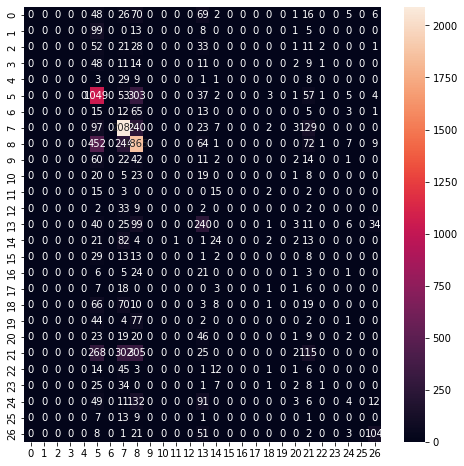

In [124]:

plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='d')

### Print Classification report

In [125]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       243
           2       0.00      0.00      0.00       126
           3       0.00      0.00      0.00       149
           4       0.00      0.00      0.00        96
           5       0.00      0.00      0.00        51
           6       0.41      0.69      0.51      1515
           7       0.00      0.00      0.00       114
           8       0.65      0.81      0.72      2590
           9       0.55      0.69      0.61      2715
          10       0.00      0.00      0.00       154
          11       0.00      0.00      0.00        76
          12       0.00      0.00      0.00        37
          13       0.00      0.00      0.00        48
          14       0.31      0.52      0.39       459
          15       0.28      0.16      0.20       150
          16       0.00      0.00      0.00        66
          17       0.00      0.00      0.00        61
          18       0.00    

/home/susan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/susan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/susan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


****